In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [133]:
df = pd.read_csv("test_compare_table.csv")
df = df.set_index('Unnamed: 0')

In [134]:
df

,VA_BERT_random_mask,VA_BERT_mask_sentiment,VA_BERT_mask_sentiment_prob_V,VA_BERT_mask_sentiment_prob_reverse_V,VA_BERT_mask_sentiment_prob_A,VA_BERT_mask_sentiment_prob_reverse_A,VA_BERT_mask_sentiment_prob_Union,VA_BERT_mask_sentiment_prob_Intersection,VA_BERT_mask_sentiment_prob_paper,VA_BERT_mask_sentiment_prob_paper_multilabel,VA_BERT_mask_sentiment_prob_Union_multilabel,VA_BERT_mask_sentiment_prob_Intersection_multilabel,VA_BERT_no_mask,VA_BERT_mask_sentiment_prob_Intersection_reverse,VA_BERT_mask_sentiment_prob_Union_reverse,VA_BERT_random_init_weight
Unnamed: 0,,,,,,,,,,,,,,,,
mae_V,0.362455,0.388811,0.374744,0.360557,0.370162,0.374278,0.371689,0.356792,0.369043,0.485917,0.487516,0.488570,0.366328,0.355048,0.362323,0.374569
mae_A,0.690289,0.720971,0.708788,0.696439,0.720037,0.709992,0.701629,0.674131,0.703054,0.894911,0.895962,0.895818,0.703562,0.670515,0.681545,0.697335
rmse_V,0.483800,0.521826,0.506455,0.481379,0.492311,0.498845,0.494355,0.474425,0.497553,0.671843,0.672326,0.672682,0.483736,0.469219,0.484919,0.496005
rmse_A,0.890361,0.919238,0.908630,0.892120,0.918794,0.911079,0.896670,0.861416,0.901319,1.112256,1.114685,1.114146,0.893665,0.857265,0.870830,0.884592
r_V,0.708686,0.663907,0.677858,0.716687,0.701406,0.690946,0.704991,0.728200,0.693619,0.019157,-0.001207,-0.004408,0.711788,0.737212,0.701454,0.703588
r_A,0.642943,0.615525,0.630507,0.652641,0.628153,0.633310,0.638582,0.667954,0.636244,0.009925,0.003545,0.016985,0.631222,0.671633,0.654990,0.632106
mape_V,12.633724,13.895969,13.397132,12.640278,13.120684,13.154454,13.138253,12.518581,13.024439,19.094792,19.168786,19.186267,12.775604,12.394510,12.724046,13.411564
mape_A,15.385192,16.079888,15.858871,15.637929,16.017318,15.909079,15.586304,14.845344,15.649005,20.347792,20.270702,20.292240,15.625450,14.794542,15.167436,15.658789
mdae_V,0.279246,0.294357,0.281023,0.274486,0.289518,0.284438,0.287919,0.276849,0.287282,0.335191,0.336776,0.344252,0.291670,0.284093,0.278620,0.293904


In [135]:
d = {'VA_BERT_random_mask':'DVA-BERT-RM',
    'VA_BERT_mask_sentiment':'DVA-BERT-MS',
    'VA_BERT_mask_sentiment_prob_V':'DVA-BERT-MV',
    'VA_BERT_mask_sentiment_prob_reverse_V':'DVA-BERT-MRV',
    'VA_BERT_mask_sentiment_prob_A':'DVA-BERT-MA',
    'VA_BERT_mask_sentiment_prob_reverse_A':'DVA-BERT-MRA',
    'VA_BERT_mask_sentiment_prob_Union':'DVA-BERT-VAU',
    'VA_BERT_mask_sentiment_prob_Intersection':'DVA-BERT-VAI',
    #'VA_BERT_mask_sentiment_prob_Intersection_multilabel':'VA-BERT(VAIMC)',
    'VA_BERT_no_mask':'DVA-BERT-NM',
    'VA_BERT_mask_sentiment_prob_Intersection_reverse':'DVA-BERT',
    'VA_BERT_mask_sentiment_prob_Union_reverse':'DVA-BERT-RVAU'}

In [136]:
df = df[d.keys()]
df.columns = df.columns.to_series().map(d)

In [137]:
df = df.loc[:, ~df.columns.str.contains("multilabel")]

In [138]:
scaler = MinMaxScaler()

In [139]:
df.loc[['mae_A']].values

array([[0.69028883, 0.72097057, 0.7087883 , 0.69643908, 0.72003744,
        0.70999218, 0.7016288 , 0.67413104, 0.70356239, 0.67051466,
        0.68154479]])

In [140]:
for i in ['mae', 'rmse', 'r', 'mape', 'mdae']:
    d = (scaler.fit_transform(df.loc[['{}_V'.format(i)]].values.reshape(11,1)).ravel()+scaler.fit_transform(df.loc[['{}_A'.format(i)]].values.reshape(11,1)).ravel())/2
    df.loc[i] = d.ravel()

In [141]:
df

,DVA-BERT-RM,DVA-BERT-MS,DVA-BERT-MV,DVA-BERT-MRV,DVA-BERT-MA,DVA-BERT-MRA,DVA-BERT-VAU,DVA-BERT-VAI,DVA-BERT-NM,DVA-BERT,DVA-BERT-RVAU
Unnamed: 0,,,,,,,,,,,
mae_V,0.362455,0.388811,0.374744,0.360557,0.370162,0.374278,0.371689,0.356792,0.366328,0.355048,0.362323
mae_A,0.690289,0.720971,0.708788,0.696439,0.720037,0.709992,0.701629,0.674131,0.703562,0.670515,0.681545
rmse_V,0.483800,0.521826,0.506455,0.481379,0.492311,0.498845,0.494355,0.474425,0.483736,0.469219,0.484919
rmse_A,0.890361,0.919238,0.908630,0.892120,0.918794,0.911079,0.896670,0.861416,0.893665,0.857265,0.870830
r_V,0.708686,0.663907,0.677858,0.716687,0.701406,0.690946,0.704991,0.728200,0.711788,0.737212,0.701454
r_A,0.642943,0.615525,0.630507,0.652641,0.628153,0.633310,0.638582,0.667954,0.631222,0.671633,0.654990
mape_V,12.633724,13.895969,13.397132,12.640278,13.120684,13.154454,13.138253,12.518581,12.775604,12.394510,12.724046
mape_A,15.385192,16.079888,15.858871,15.637929,16.017318,15.909079,15.586304,14.845344,15.625450,14.794542,15.167436
mdae_V,0.279246,0.294357,0.281023,0.274486,0.289518,0.284438,0.287919,0.276849,0.291670,0.284093,0.278620


In [142]:
as_list = df.index.tolist()
print(as_list)

['mae_V', 'mae_A', 'rmse_V', 'rmse_A', 'r_V', 'r_A', 'mape_V', 'mape_A', 'mdae_V', 'mdae_A', 'Average_VA', 'rank_r_V', 'rank_r_A', 'rank_mae_V', 'rank_mae_A', 'rank_rmse_V', 'rank_rmse_A', 'rank_mape_V', 'rank_mape_A', 'rank_mdae_V', 'rank_mdae_A', 'average_rank', 'mae', 'rmse', 'r', 'mape', 'mdae']


In [143]:
l=[]

for i in as_list:
    if '_A' in i:
        x = i.replace('_A','_V')
        l.append(x)
    elif ('_V' in i) & (i != 'Average_VA'):
        x = i.replace('_V','_A')
        l.append(x)
    else:
        l.append(i)
df.index = l

In [144]:
df2=df[:10].stack().reset_index()
df2.columns = ['index','model','Values']

In [145]:
df3=df[-5:].stack().reset_index()
df3.columns = ['index','model','Values']

In [146]:
draw = df2[df2['index'].str.contains('mae_V')]
draw

,index,model,Values
11,mae_V,DVA-BERT-RM,0.690289
12,mae_V,DVA-BERT-MS,0.720971
13,mae_V,DVA-BERT-MV,0.708788
14,mae_V,DVA-BERT-MRV,0.696439
15,mae_V,DVA-BERT-MA,0.720037
16,mae_V,DVA-BERT-MRA,0.709992
17,mae_V,DVA-BERT-VAU,0.701629
18,mae_V,DVA-BERT-VAI,0.674131
19,mae_V,DVA-BERT-NM,0.703562
20,mae_V,DVA-BERT,0.670515


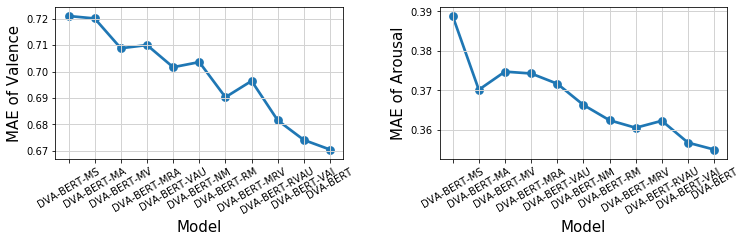

In [155]:
plt.figure(figsize=(11,4))

draw = df2[df2['index'].str.contains('mae_V')]
draw = draw.rename(columns={'Values':'MAE of Valence'})

plt.subplot(1,2,1)

ax = sns.pointplot(x='model', y='MAE of Valence', hue='index', data=draw, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('MAE of Valence', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.get_legend().remove()

draw1 = df2[df2['index'].str.contains('mae_A')]
draw1 = draw1.rename(columns={'Values':'MAE of Arousal'})

plt.subplot(1,2,2)

ax = sns.pointplot(x='model', y='MAE of Arousal', hue='index', data=draw1, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('MAE of Arousal', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.get_legend().remove()

plt.tight_layout(pad=3.0)

plt.savefig('mae.png', dpi=300, bbox_inches='tight')

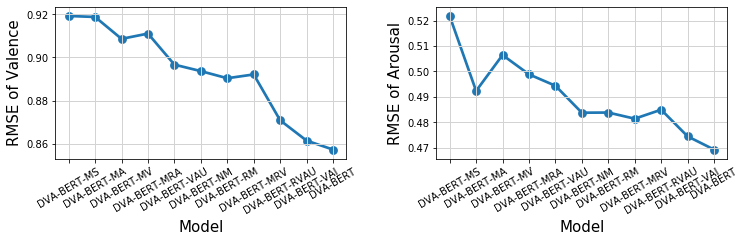

In [153]:
plt.figure(figsize=(11,4))

draw = df2[df2['index'].str.contains('rmse_V')]
draw = draw.rename(columns={'Values':'RMSE of Valence'})

plt.subplot(1,2,1)

ax = sns.pointplot(x='model', y='RMSE of Valence', hue='index', data=draw, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('RMSE of Valence', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.get_legend().remove()

draw1 = df2[df2['index'].str.contains('rmse_A')]
draw1 = draw1.rename(columns={'Values':'RMSE of Arousal'})

plt.subplot(1,2,2)

ax = sns.pointplot(x='model', y='RMSE of Arousal', hue='index', data=draw1, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('RMSE of Arousal', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.get_legend().remove()

plt.tight_layout(pad=3.0)

plt.savefig('rmse.png', dpi=300, bbox_inches='tight')

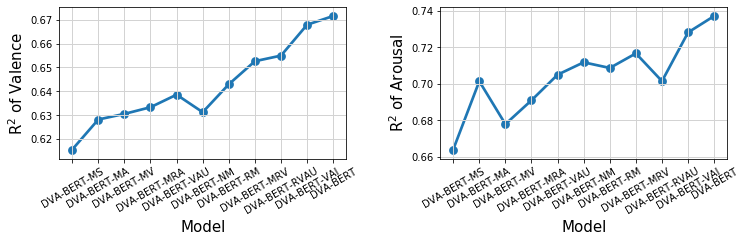

In [161]:
plt.figure(figsize=(11,4))

draw = df2[df2['index'].str.contains('r_V')]
draw = draw.rename(columns={'Values':'R^2 of Valence'})

plt.subplot(1,2,1)

ax = sns.pointplot(x='model', y='R^2 of Valence', hue='index', data=draw, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('R$^{2}$ of Valence', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.get_legend().remove()

draw1 = df2[df2['index'].str.contains('r_A')]
draw1 = draw1.rename(columns={'Values':'R^2 of Arousal'})

plt.subplot(1,2,2)

ax = sns.pointplot(x='model', y='R^2 of Arousal', hue='index', data=draw1, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('R$^{2}$ of Arousal', fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.get_legend().remove()

plt.tight_layout(pad=3.0)

plt.savefig('r.png', dpi=300, bbox_inches='tight')

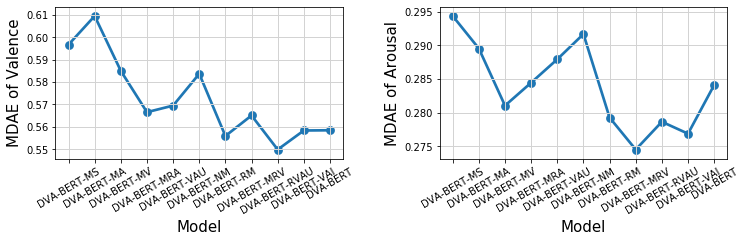

In [158]:
plt.figure(figsize=(11,4))

draw = df2[df2['index'].str.contains('mdae_V')]
draw = draw.rename(columns={'Values':'MDAE of Valence'})

plt.subplot(1,2,1)

ax = sns.pointplot(x='model', y='MDAE of Valence', hue='index', data=draw, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('MDAE of Valence', fontsize=15)
ax.get_legend().remove()

draw1 = df2[df2['index'].str.contains('mdae_A')]
draw1 = draw1.rename(columns={'Values':'MDAE of Arousal'})

plt.subplot(1,2,2)

ax = sns.pointplot(x='model', y='MDAE of Arousal', hue='index', data=draw1, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('MDAE of Arousal', fontsize=15)
ax.get_legend().remove()

plt.tight_layout(pad=3.0)

plt.savefig('mdae.png', dpi=300, bbox_inches='tight')

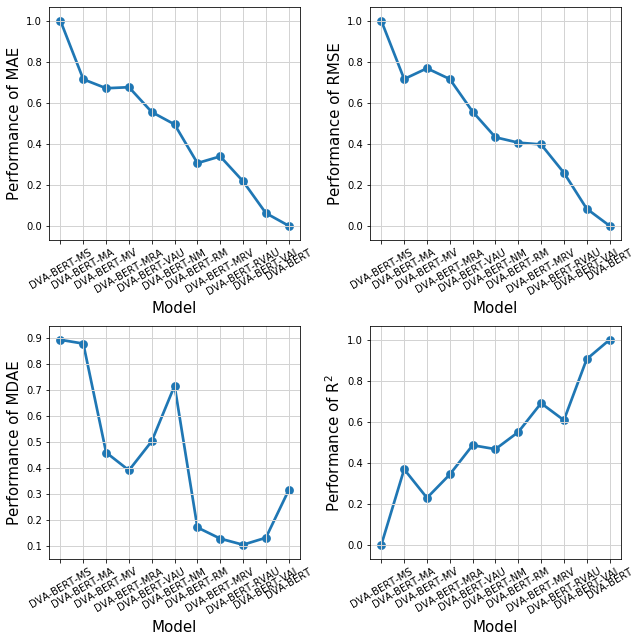

In [72]:
plt.figure(figsize=(9,9))

draw = df3[df3['index'].str.contains('mae')]
draw = draw.rename(columns={'Values':'MAE'})

plt.subplot(2,2,1)

ax = sns.pointplot(x='model', y='MAE', hue='index', data=draw, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('Performance of MAE', fontsize=15)
ax.get_legend().remove()

draw = df3[df3['index'].str.contains('rmse')]
draw = draw.rename(columns={'Values':'RMSE'})
plt.subplot(2,2,2)

ax = sns.pointplot(x='model', y='RMSE', hue='index', data=draw, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('Performance of RMSE', fontsize=15)
ax.get_legend().remove()

draw = df3[['mdae'== s for s in df3['index']]]
draw = draw.rename(columns={'Values':'MDAE'})

plt.subplot(2,2,3)

ax = sns.pointplot(x='model', y='MDAE', hue='index', data=draw, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('Performance of MDAE', fontsize=15)
ax.get_legend().remove()

draw = df3[['r'== s for s in df3['index']]]
draw = draw.rename(columns={'Values':'R-Square'})

plt.subplot(2,2,4)

ax = sns.pointplot(x='model', y='R-Square', hue='index', data=draw, order=[
 'DVA-BERT-MS',
 'DVA-BERT-MA',
 'DVA-BERT-MV',
 'DVA-BERT-MRA',
 'DVA-BERT-VAU',
 'DVA-BERT-NM',
 'DVA-BERT-RM',
 'DVA-BERT-MRV',
 'DVA-BERT-RVAU',
 'DVA-BERT-VAI',
 'DVA-BERT',
])

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('Performance of R$^{2}$', fontsize=15)
ax.get_legend().remove()

plt.tight_layout(pad=1.0)

plt.savefig('index.png', dpi=300, bbox_inches='tight')

In [73]:
df = pd.read_csv("test_result_alpha.csv")
df = df.loc[:, ~df.columns.str.contains("multilabel")]
df = df.set_index('Unnamed: 0')
d = {'VA_BERT_random_mask':'DVA-BERT-RM',
    'VA_BERT_mask_sentiment':'DVA-BERT-MS',
    'VA_BERT_mask_sentiment_prob_V':'DVA-BERT-MV',
    'VA_BERT_mask_sentiment_prob_reverse_V':'DVA-BERT-MRV',
    'VA_BERT_mask_sentiment_prob_A':'DVA-BERT-MA',
    'VA_BERT_mask_sentiment_prob_reverse_A':'DVA-BERT-MRA',
    'VA_BERT_mask_sentiment_prob_Union':'DVA-BERT-VAU',
    'VA_BERT_mask_sentiment_prob_Intersection':'DVA-BERT-VAI',
    #'VA_BERT_mask_sentiment_prob_Intersection_multilabel':'VA-BERT(VAIMC)',
    #'VA_BERT_no_mask':'DVA-BERT-NM',
    'VA_BERT_mask_sentiment_prob_Intersection_reverse':'DVA-BERT',
    'VA_BERT_mask_sentiment_prob_Union_reverse':'DVA-BERT-RVAU'}
df = df[d.keys()]
df.columns = df.columns.to_series().map(d)

In [74]:
df2=df[:8].stack().reset_index()
df2.columns = ['alpha','model','mae']

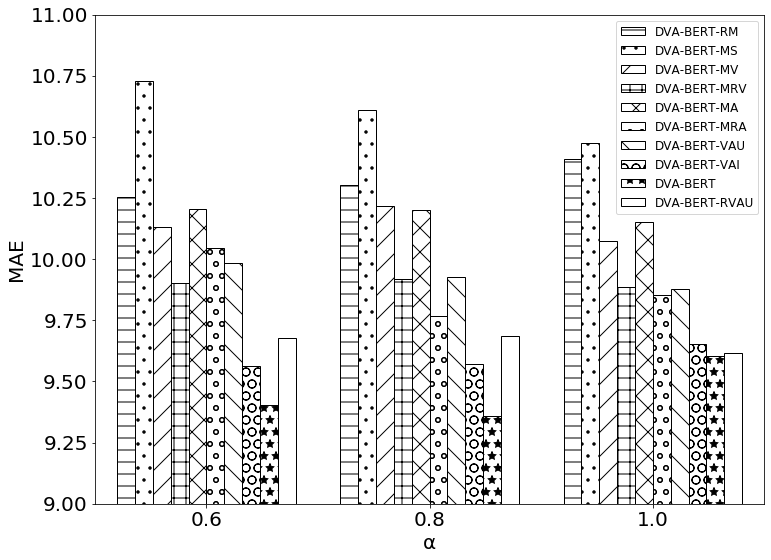

In [78]:
plt.figure(figsize=(12,9))
bar = sns.barplot(x="alpha", 
            y="mae", 
            hue="model", 
            data=df2,
            facecolor=(1, 1, 1, 0),
            edgecolor='black')
plt.ylabel("MAE", size=20)
plt.xlabel("α", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


for container, hatch in zip(bar.containers, ('-', '.', '/','+', 'x', 'o','\\','O','*')):
    for patch in container.patches:
        patch.set_hatch(hatch)

plt.ylim([9, 11])
plt.legend(fontsize=12, loc='upper right')
plt.savefig("alpha_hist.png", dpi=300, bbox_inches='tight')

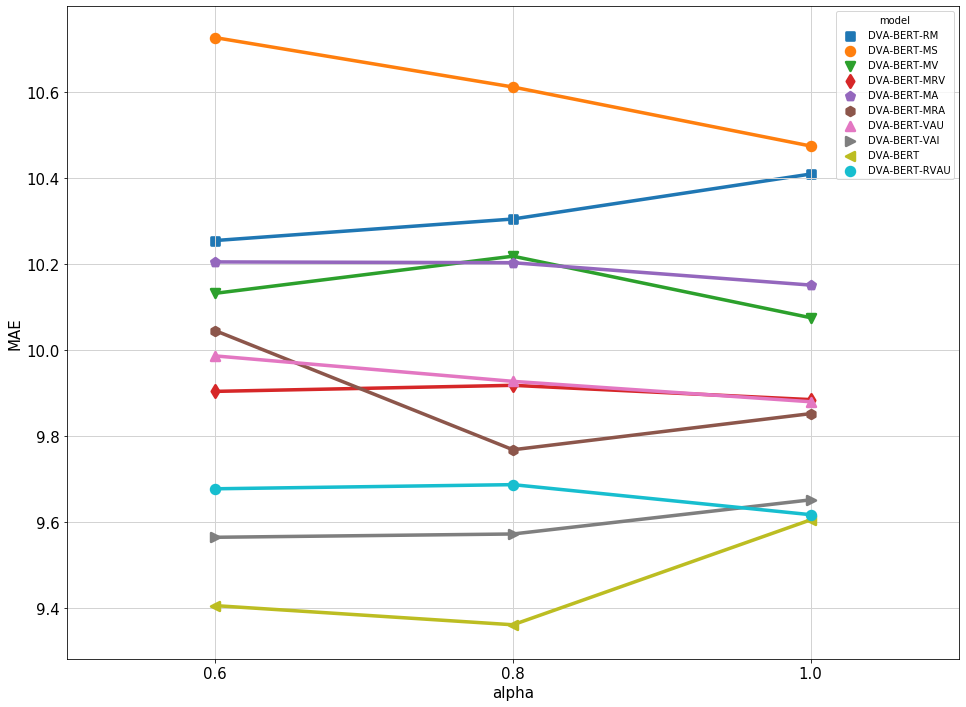

In [79]:
plt.figure(figsize=(16,12))

ax = sns.pointplot(x='alpha', 
                   y='mae', 
                   hue='model', 
                   data=df2, 
                   order={0.6, 0.8, 1.0}, 
                   markers=['s','o','v','d','p','h','^','>','<','o'], 
                   scale = 1.3)

ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
ax.set_xlabel('alpha', fontsize=15);
ax.set_ylabel('MAE',fontsize=15);
ax.set_xticklabels([0.6,0.8,1.0], size = 15)
ax.set_yticklabels(np.round(ax.get_yticks(),2), size = 15)
plt.savefig('alpha.png',dpi=300, bbox_inches='tight')
plt.show()

In [124]:
df = pd.read_csv("test_compare_table.csv")
df = df.set_index('Unnamed: 0')

In [125]:
df = df[['VA_BERT_mask_sentiment_prob_Intersection_multilabel', 'VA_BERT_mask_sentiment_prob_Intersection_reverse']][:10]
d = {'VA_BERT_mask_sentiment_prob_Intersection_multilabel':'DVA-BERT-TG',
    'VA_BERT_mask_sentiment_prob_Intersection_reverse':'DVA-BERT'}
df = df[d.keys()]
df.columns = df.columns.to_series().map(d)

In [126]:
df2=df[:10].stack().reset_index()
df2.columns = ['index','model','Values']

In [127]:
df2.loc[8,'Values'] = 0.65

In [128]:
df2.loc[10,'Values'] = 0.52

In [129]:
df2['index'] = df2['index'].str.replace('_', '__')

In [130]:
df_VAI = df2[df2['model'] == 'DVA-BERT'].groupby(df2['index'].str[:3]).mean()
df_VAI.index = df_VAI.index.map({'mae':'MAE', 'mda':'MDAE', 'r__':'R$^{2}$', 'rms':'RMSE'})
df_VAI.reset_index(inplace=True)
df_VAI.columns = df_VAI.columns.to_series().map({'index':'indicators','Values':'values','model':'model'})
df_VAI['model'] = 'DVA-BERT'

df_VAITG = df2[df2['model'] == 'DVA-BERT-TG'].groupby(df2['index'].str[:3]).mean()
df_VAITG.index = df_VAITG.index.map({'mae':'MAE', 'mda':'MDAE', 'r__':'R$^{2}$', 'rms':'RMSE'})
df_VAITG.reset_index(inplace=True)
df_VAITG.columns = df_VAITG.columns.to_series().map({'index':'indicators','Values':'values','model':'model'})
df_VAITG['model'] = 'DVA-BERT-TG'

df2 = df_VAI.append(df_VAITG)
df2 = df2.dropna()

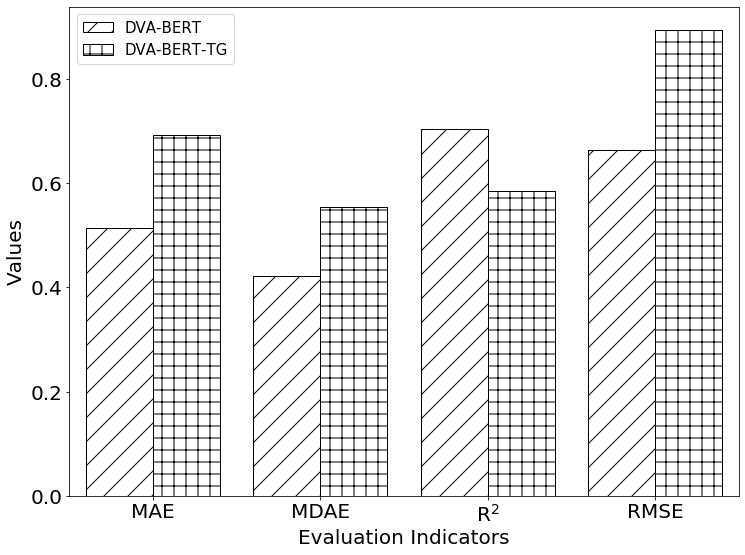

In [131]:
plt.figure(figsize=(12,9))

bar = sns.barplot(x="indicators", 
            y="values", 
            hue="model", 
            data=df2,
            hatch='/',
            facecolor=(1, 1, 1, 0),
            edgecolor='black')
plt.ylabel("Values", size=20)
plt.xlabel("Evaluation Indicators", size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for container, hatch in zip(bar.containers, ("/", "+")):
    for patch in container.patches:
        patch.set_hatch(hatch)
        
plt.legend(fontsize=15, loc='upper left')
plt.savefig("multitarget.png", dpi=300, bbox_inches='tight')

In [171]:
#GRU
GRU_MAE=(0.37+0.74+0.38+0.71+0.36+0.70+0.34+0.66+0.33+0.70)/4
GRU_RMSE=(0.50+0.94+0.51+0.91+0.46+0.90+0.45+0.85+0.43+0.90)/4
GRU_MDAE=0
GRU_R=((0.46+0.31)/2+(0.43+0.35)/2+(0.50+0.30)/2+(0.57+0.43)/2+(0.43+0.32)/2)/4

#RNN
RNN_MAE=(0.36+0.70+0.39+0.71+0.35+0.69+0.34+0.67+0.33+0.67)/4
RNN_RMSE=(0.49+0.88+0.52+0.92+0.46+0.88+0.44+0.85+0.43+0.85)/4
RNN_MDAE=0
RNN_R=((0.47+0.38)/2+(0.40+0.37)/2+(0.50+0.33)/2+(0.58+0.42)/2+(0.43+0.39))/4

#LSTM
LSTM_MAE=(0.39+0.77+0.39+0.73+0.35+0.72+0.35+0.68+0.35+0.68)/4
LSTM_RMSE=(0.51+0.98+0.51+0.94+0.45+0.93+0.46+0.91+0.45+0.86)/4
LSTM_MDAE=0
LSTM_R=((0.43+0.23)/2+(0.43+0.30)/2+(0.52+0.24)/2+(0.54+0.33)/2+(0.50+0.37))/4

In [172]:
print(GRU_MAE)
print(GRU_RMSE)
print(GRU_R)
print('--------')

print(RNN_MAE)
print(RNN_RMSE)
print(RNN_R)
print('--------')

print(LSTM_MAE)
print(LSTM_RMSE)
print(LSTM_R)
print('--------')

1.3225
1.7125
0.5125
--------
1.3025
1.68
0.63625
--------
1.3525
1.7500000000000002
0.5950000000000001
--------
